In [1]:
%load_ext autoreload
%autoreload 2


import pyarrow.parquet as pq
import pandas as pd
from tqdm import tqdm 
import time
import numpy as np
import matplotlib.pyplot as plt

## Set bigger widths in columns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
def annotate(ax, xoff = -0.25, yoff = 0.5):
    """
    annotate bargraph with numbers on top
    of each bar
    """
    x_offset = xoff
    y_offset = yoff
    for p in ax.patches:
        b = p.get_bbox()
        val = "{}".format(int(b.y1 + b.y0))        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

    

In [5]:

canary_act = pq.read_table('../../data/CANARY/CANARY/ACTIVITY_LOG').to_pandas()
canary_ps  = pq.read_table('../../data/CANARY/CANARY/PERSON_SUMMARY').to_pandas()

### Canary Person Summary

In [6]:
canary_ps.head()

PERS_ID       MBR_ID GROUPNUMBER               GROUPNAME       LOB                                          FILE_NAME   FILE_DATE  N_MILESTONES_ACHIEVED REGISTER_DATE LAST_ACTIVITY_DATE   LAST_COMPLETED_MILESTONE
0  2638452  M0006106300       37330  Medicare Advantage 175  Medicare  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                      1    2020-01-26         2020-01-26              REGISTER_DATE
1  2706146  M0010332600       36550  Medicare Advantage 125  Medicare  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                      9    2020-05-27         2020-08-31   9TH_LESSON_COMPLETE_DATE
2  4122088  CD116486701       35938          365 LifePoints        LG  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                     17    2019-11-20         2020-05-29  17TH_LESSON_COMPLETE_DATE
3  4254340  CD127136501       35938          365 LifePoints        LG  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                     17    2019-02-04         2019-07-24  17TH_LESSON_COMPLETE_DATE
4  4275621  CD128714401       35938          365 LifePoints       ASO  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                     16    2020-01-24         2020-09-01  16TH_LESSON_COMPLETE_DATE

### Canary Acivity Log

In [7]:
canary_act.head()

PERS_ID       MBR_ID GROUPNUMBER               GROUPNAME                                          FILE_NAME   FILE_DATE                 MILESTONE COMPLETION_DATE
0  2638452  M0006106300       37330  Medicare Advantage 175  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-21             REGISTER_DATE      2020-01-26
1  2706146  M0010332600       36550  Medicare Advantage 125  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-21             REGISTER_DATE      2020-05-27
2  2706146  M0010332600       36550  Medicare Advantage 125  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-21          ORIENTATION_DATE      2020-06-08
3  2706146  M0010332600       36550  Medicare Advantage 125  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-21  3RD_LESSON_COMPLETE_DATE      2020-06-20
4  2706146  M0010332600       36550  Medicare Advantage 125  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-21  4TH_LESSON_COMPLETE_DATE      2020-07-02

### Biometrics Data

In [10]:
st = time.time()
bio = pq.read_table('../../data/BIOMETRICS').to_pandas()
print("took:{}".format(time.time() - st))

took:24.500811338424683


In [11]:
bio.head()

PERS_ID           EVENT_DATE                    DATE_TYPE BIOMETRIC_CATEGORY EVENT_CODE CODING_STANDARD      SOURCE        RESULT_VALUE
0  2570719  2019-10-02 20:22:36                    CALC_DATE                BMI       None            None  CALCULATED  25.537491894749788
1  2570719  2019-01-07 07:37:00  specimen_collected_datetime          Potassium     2823-3              LN       HIXNY   5.099999904632568
2  2570719  2018-12-08 05:34:12         OBSERVATION_DATETIME             Height     8302-2                       HIXNY    70.0000390014801
3  2570719  2018-12-11 07:42:07         OBSERVATION_DATETIME             Height     8302-2                       HIXNY    70.0000390014801
4  2570719  2018-12-04 19:34:56                    CALC_DATE                BMI       None            None  CALCULATED  26.398623434221204

In [12]:
#canary_act['PERS_ID'] = canary_act.PERS_ID.astype(int)
bio[bio.PERS_ID.isnull()]

PERS_ID  EVENT_DATE               DATE_TYPE BIOMETRIC_CATEGORY EVENT_CODE CODING_STANDARD   SOURCE RESULT_VALUE
12236238    None  2020-08-19  OBSERVATION_START_DATE                A1C     4548-4           LOINC  LabCorp          4.8
12236239    None  2020-09-14  OBSERVATION_START_DATE         DCSI-SERUM     2160-0           LOINC  LabCorp         0.82
12236240    None  2020-06-03  OBSERVATION_START_DATE               eGFR    88294-4           LOINC  LabCorp        106.0
12236241    None  2020-09-22  OBSERVATION_START_DATE                A1C     4548-4           LOINC  LabCorp          6.0
12236242    None  2020-07-10  OBSERVATION_START_DATE                A1C     4548-4           LOINC  LabCorp          5.8
...          ...         ...                     ...                ...        ...             ...      ...          ...
12241043    None  2020-01-07  OBSERVATION_START_DATE         Hemoglobin      718-7           LOINC  LabCorp         12.5
12241044    None  2019-05-03  OBSERVATION_START_DATE         Hemoglobin      718-7           LOINC  LabCorp         17.6
12241045    None  2020-05-18  OBSERVATION_START_DATE          Potassium     2823-3           LOINC  LabCorp          4.1
12241046    None  2019-06-26  OBSERVATION_START_DATE         DCSI-SERUM     2160-0           LOINC  LabCorp         0.78
12241047    None  2020-08-07  OBSERVATION_START_DATE         DCSI-SERUM     2160-0           LOINC  LabCorp         0.81

[4810 rows x 8 columns]

### Different Date Types

In [13]:
date_types = bio.DATE_TYPE.unique()

In [14]:
for typei in date_types:
    print(typei)

CALC_DATE
specimen_collected_datetime
OBSERVATION_DATETIME
SVC_DT
result_datetime
OBSERVATION_START_DATE
update_time
entered_on_datetime
ASSESSMENT_DATE
from_datetime
A1C_DATE


### Different Coding Standards

In [15]:
standards = bio.CODING_STANDARD.unique()
for typei in standards:
    print(typei)

None
LN

LOINC
CAE Concept
ELLS
PHA
1.2.840.113619.21.100.12.1053.4781334832089962761


### Different Sources

In [16]:
sources = bio.SOURCE.unique()
for typei in sources:
    print(typei)

CALCULATED
HIXNY
HEDIS Supp
LabCorp
CAE
PHA
MIPTA


### Null Count in Biometric Dataset

In [22]:
st = time.time()
bio_null = bio.isnull().sum(axis = 0)
print(time.time() - st)

15.249207019805908


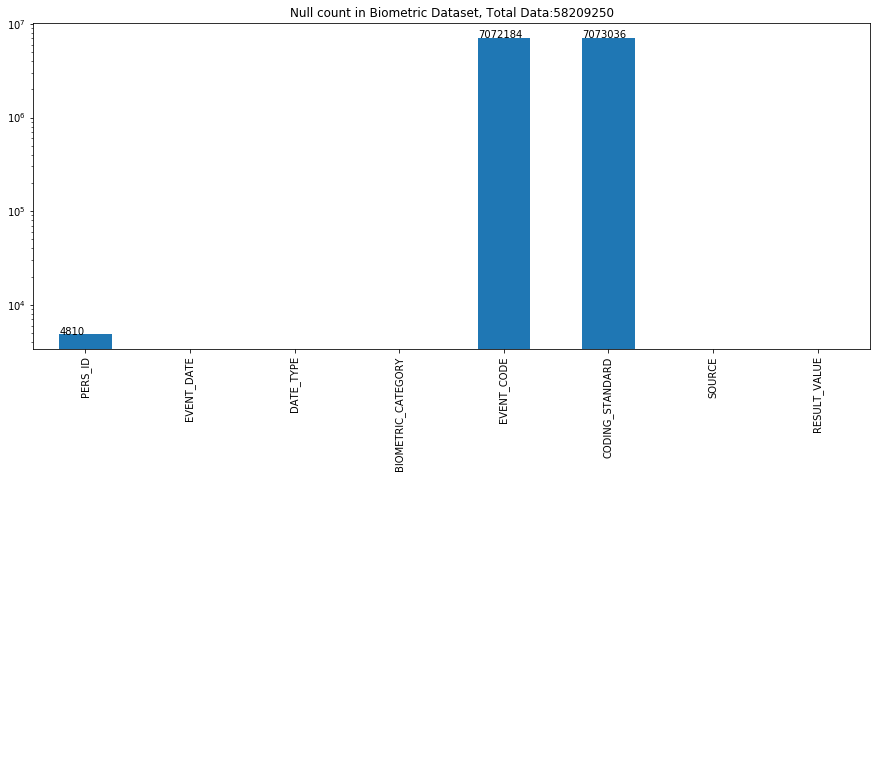

In [24]:
ax3 = bio_null.plot.bar(title = 'Null count in Biometric Dataset, Total Data:{}'.format(len(bio)), logy = True,  figsize = [15, 6])
annotate(ax3, xoff = -0.25, yoff = 0.1)
plt.show()


### Counts of Biometric Events per Event

In [32]:
st = time.time()
bio_count = bio.groupby(by = 'BIOMETRIC_CATEGORY')['BIOMETRIC_CATEGORY'].apply(lambda x: len(x))
print(time.time() - st)

8.709010601043701


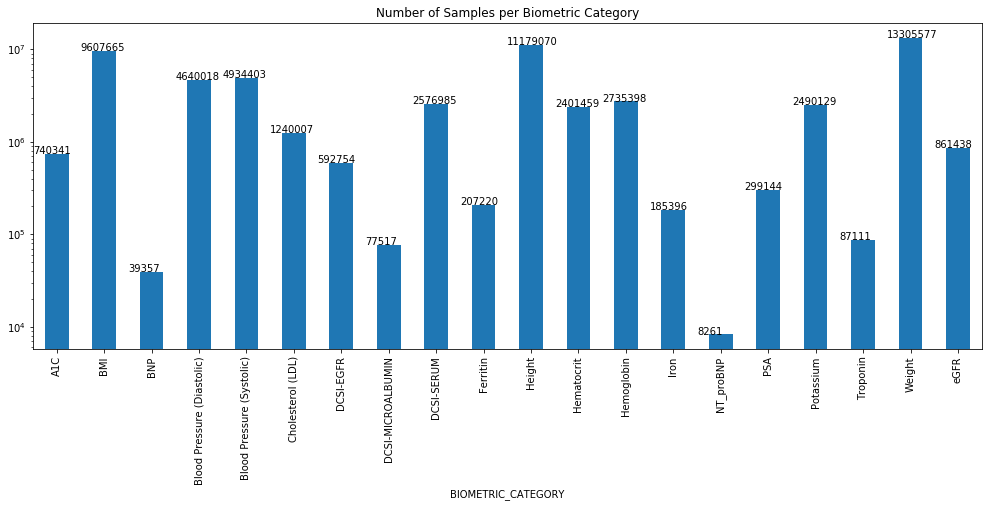

In [33]:
ax1 = bio_count.plot.bar(title = 'Number of Samples per Biometric Category', logy = True, figsize = [17, 6])
annotate(ax1, xoff = -0.5, yoff = 0.5)
plt.show()

### Number of Unique Elements Per Column

In [34]:
bio_unique = bio.apply(lambda x : len(x.unique()), axis = 0)

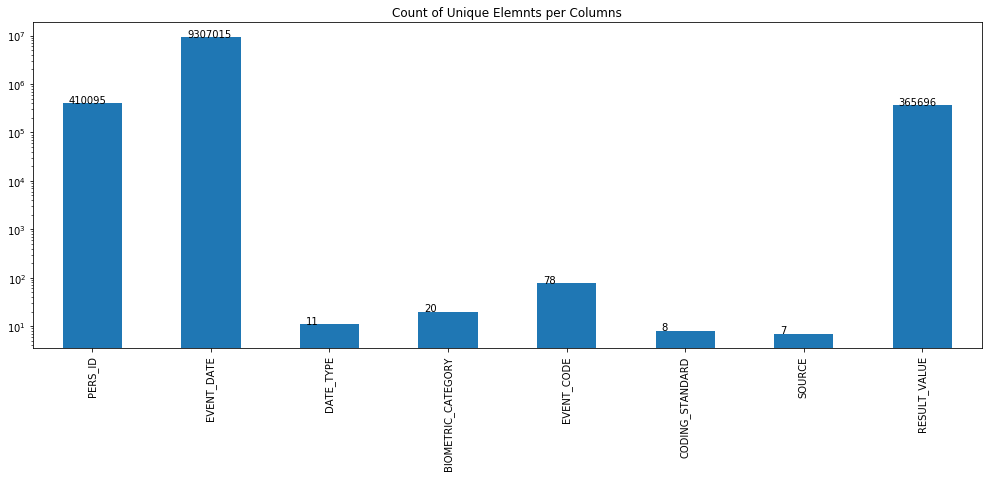

In [35]:
ax = bio_unique.plot.bar(title = 'Count of Unique Elemnts per Columns', logy = True, figsize = [17, 6])
annotate(ax, xoff = -0.2, yoff = 0.15)

plt.show()

### Canary and Biometrics Join

In [36]:
bio_can = canary_ps.merge(bio, how = 'inner', on = 'PERS_ID')

In [37]:
bio_can.head()

PERS_ID       MBR_ID GROUPNUMBER               GROUPNAME       LOB                                          FILE_NAME   FILE_DATE  N_MILESTONES_ACHIEVED REGISTER_DATE LAST_ACTIVITY_DATE LAST_COMPLETED_MILESTONE           EVENT_DATE             DATE_TYPE BIOMETRIC_CATEGORY EVENT_CODE CODING_STANDARD      SOURCE        RESULT_VALUE
0  2638452  M0006106300       37330  Medicare Advantage 175  Medicare  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                      1    2020-01-26         2020-01-26            REGISTER_DATE  2019-10-28 07:06:00             CALC_DATE                BMI       None            None  CALCULATED   24.80655324511657
1  2638452  M0006106300       37330  Medicare Advantage 175  Medicare  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                      1    2020-01-26         2020-01-26            REGISTER_DATE  2018-08-03 01:29:56  OBSERVATION_DATETIME             Weight     3141-9                       HIXNY  160.93725999999998
2  2638452  M0006106300       37330  Medicare Advantage 175  Medicare  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                      1    2020-01-26         2020-01-26            REGISTER_DATE  2018-08-30 08:01:16             CALC_DATE                BMI       None            None  CALCULATED  24.434210151237654
3  2638452  M0006106300       37330  Medicare Advantage 175  Medicare  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                      1    2020-01-26         2020-01-26            REGISTER_DATE  2018-08-02 10:40:00       result_datetime           Troponin    10839-9              LN       HIXNY   9.119999885559082
4  2638452  M0006106300       37330  Medicare Advantage 175  Medicare  s3://cdphp-s3-us-e-p-datalake/RAW/NATIVE/WELLT...  2020-09-07                      1    2020-01-26         2020-01-26            REGISTER_DATE  2018-08-02 11:26:55             CALC_DATE                BMI       None            None  CALCULATED  24.325276955299785

### Null Count in Joint Canary and  Biometric Dataset

In [38]:
bio_can_null = bio_can.apply(lambda x : sum(x.isnull()), axis = 0)

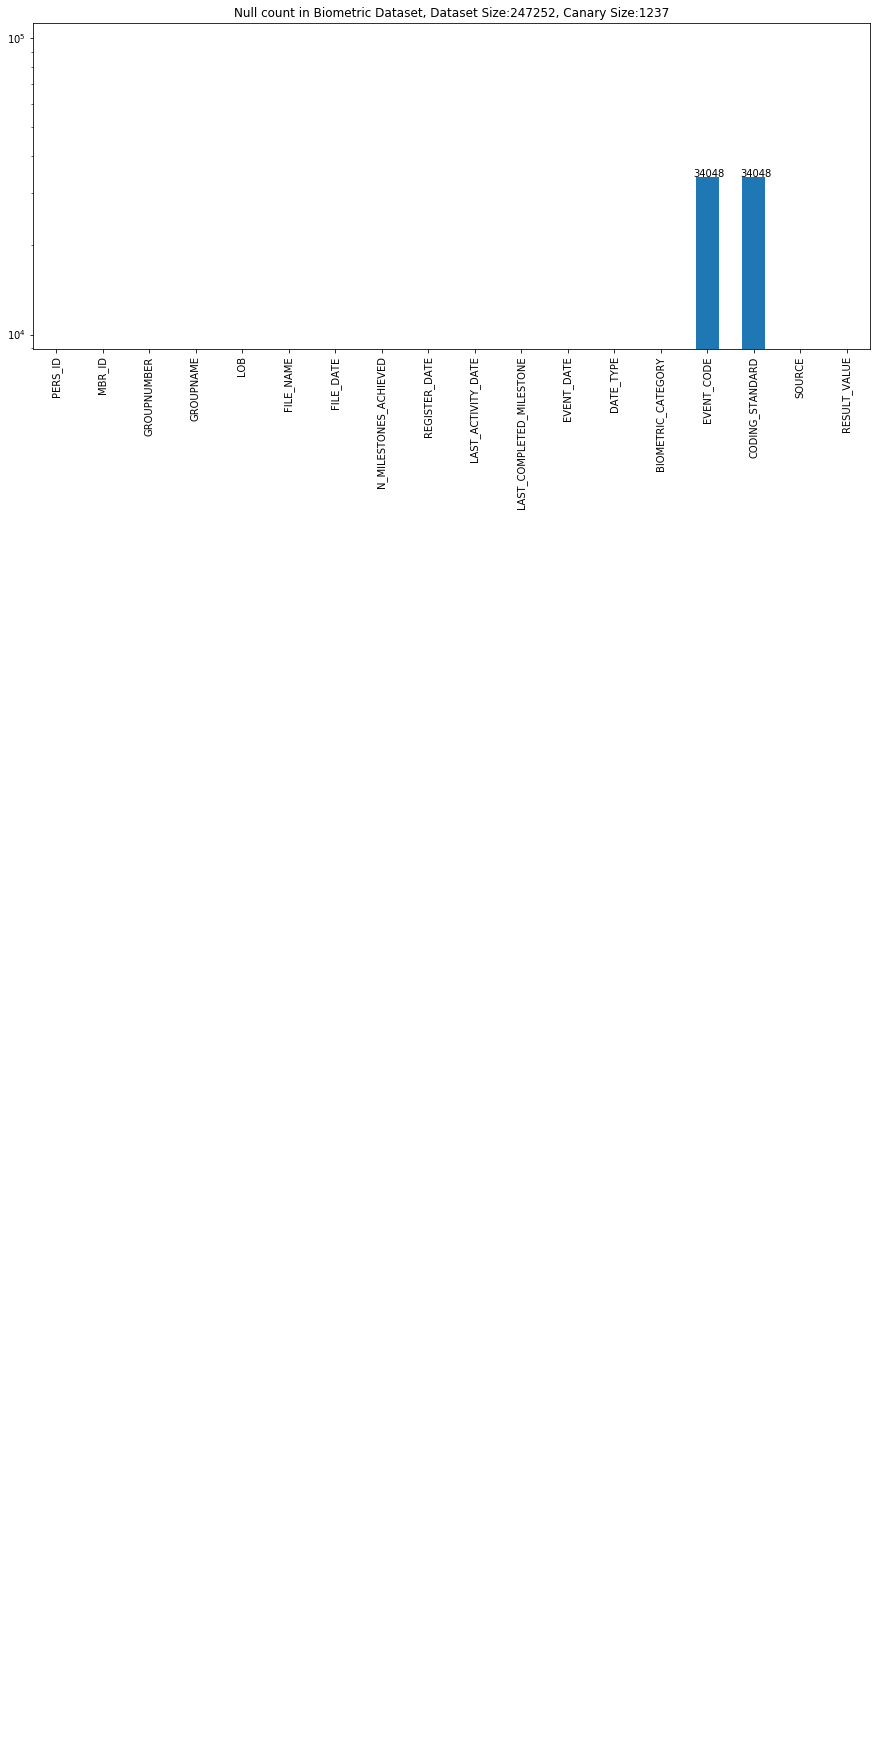

In [39]:
ax3 = bio_can_null.plot.bar(title = 'Null count in Biometric Dataset, Dataset Size:{}, Canary Size:{}'.format(len(bio_can), len(canary_ps)),
                            logy = True,  figsize = [15, 6])
annotate(ax3, xoff = -0.3, yoff = 0.2)
plt.show()


### Joint Canary Bio, Counts of Biometric Events per Event

In [40]:
bio_can_count = bio_can.groupby(by = 'BIOMETRIC_CATEGORY').apply(lambda x: len(x))

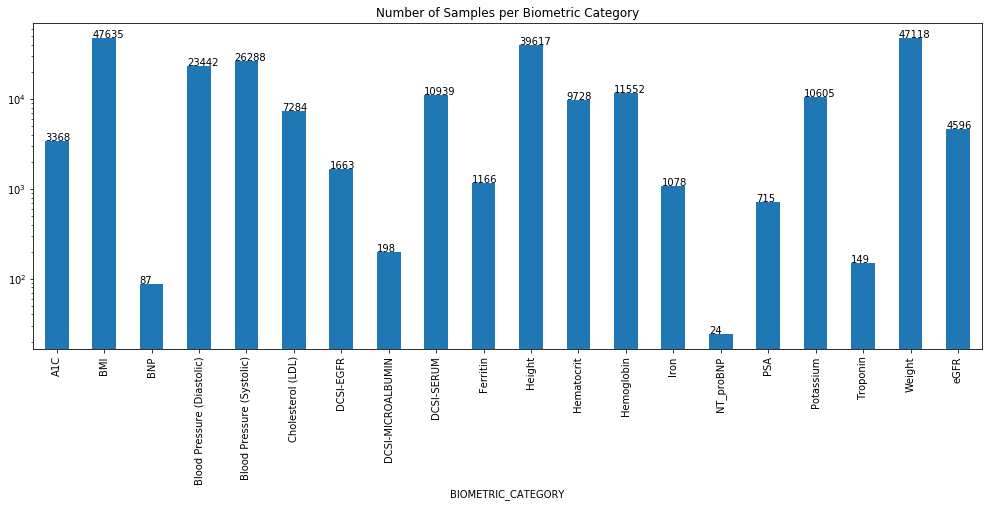

In [41]:
ax1 = bio_can_count.plot.bar(title = 'Number of Samples per Biometric Category', logy = True, figsize = [17, 6])
annotate(ax1, xoff = -0.25, yoff = 0.5)
plt.show()

### Join Canary BIOMETRICS Number of Unique Elements Per Columns

In [42]:
bio_can_unique = bio_can.apply(lambda x : len(x.unique()), axis = 0)

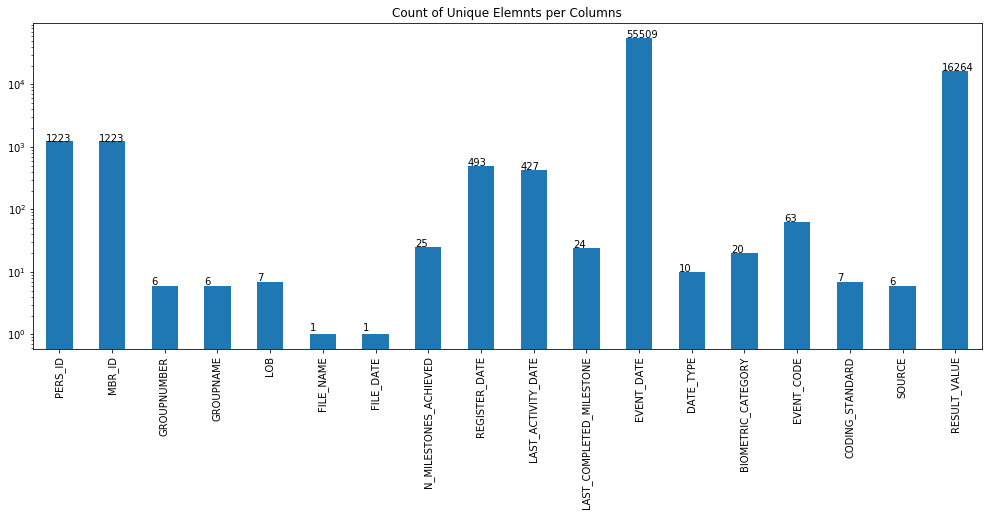

In [43]:
ax = bio_can_unique.plot.bar(title = 'Count of Unique Elemnts per Columns', logy = True, figsize = [17, 6])
annotate(ax, xoff = -0.25, yoff = 0.15)

plt.show()